# Data Wrangling
#### By Tanmay Jain

## Table of Contents
<ul>
    <li><a href="#gather">Gathering Data</a></li>
    <li><a href="#assess">Assess</a></li>
    <ul>
        <li><a href="#quality">Quality Issues</a></li>
        <li><a href="#tidy">Tidiness Issues</a></li>
    </ul>
    <li><a href="#clean">Clean</a></li>
    <li><a href="#store">Store</a></li>
    <li><a href="#visualize">Analyze and Visualize</a></li>
</ul>

In [1]:
#Import all necessary libraries
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import bs4
import tweepy
import re
import config

/home/jaintanmay121/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id='gather'></a>
# Gathering Data

In [2]:
twitterdf=pd.read_csv('twitter-archive-enhanced.csv')

#### Downloading file Programmatically

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response=requests.get(url)

with open('image_predictions.tsv', mode='wb') as f:
    f.write(response.content)

In [4]:
img=pd.read_csv('image_predictions.tsv', sep='\t')

#### Using the Tweepy library to get tweets by ID

In [5]:
#The config file contains all the security keys
auth = tweepy.OAuthHandler(config.Consumer_Key, config.Consumer_Secret)
auth.set_access_token(config.Access_Token, config.Access_Token_Secret)

api = tweepy.API(auth, 
                 parser=tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [6]:
tweets=[]
noTweets=[]
for i in twitterdf.tweet_id:
    try:
        tweets.append(api.get_status(i))
    except:
        noTweets.append(i)

#Writing the JSON tweets in the file "tweet_json.txt"
with open('tweet_json.txt', mode = 'w') as f:
    json.dump(tweets, f)

In [5]:
tweets=pd.read_json('tweet_json.txt')

<a id='assess'></a>
# Assess

#### Assessing the "twitterdf" dataset

In [6]:
twitterdf.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitterdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
#Checking for any duplicates
twitterdf.tweet_id.duplicated().sum()

0

In [9]:
twitterdf.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [10]:
twitterdf.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [11]:
twitterdf.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [12]:
twitterdf.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Rose         1
Brian        1
Coopson      1
Loomis       1
Major        1
Name: name, Length: 957, dtype: int64

In [13]:
twitterdf.source

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object

In [14]:
# Finding decimal ratings
a=twitterdf[twitterdf.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
a.reset_index(inplace=True)

/home/jaintanmay121/.local/lib/python3.6/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [15]:
for i in range(len(a.text)):
    print("Actual Rating:",re.findall(r"(\d+\.\d+)",a.text[i])[0],', Dataset Rating:',a.rating_numerator[i])

Actual Rating: 13.5 , Dataset Rating: 5
Actual Rating: 9.75 , Dataset Rating: 75
Actual Rating: 9.75 , Dataset Rating: 75
Actual Rating: 11.27 , Dataset Rating: 27
Actual Rating: 9.5 , Dataset Rating: 5
Actual Rating: 11.26 , Dataset Rating: 26


#### Assessing the "img" dataset

In [16]:
img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [17]:
img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
img.tweet_id.duplicated().sum()

0

In [19]:
img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

#### Assessing the "tweets" dataset

In [20]:
tweets.head()

,created_at,id,id_str,text,truncated,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,38841,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,33266,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,25063,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,42214,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,40361,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [21]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2345 non-null   datetime64[ns, UTC]
 1   id                             2345 non-null   int64              
 2   id_str                         2345 non-null   int64              
 3   text                           2345 non-null   object             
 4   truncated                      2345 non-null   bool               
 5   entities                       2345 non-null   object             
 6   extended_entities              1824 non-null   object             
 7   source                         2345 non-null   object             
 8   in_reply_to_status_id          78 non-null     float64            
 9   in_reply_to_status_id_str      78 non-null     float64            
 10  in_reply_to_user_id     

In [22]:
twitterdf.iloc[45].text

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [23]:
twitterdf.rating_numerator[44:47]

44    12
45     5
46    13
Name: rating_numerator, dtype: int64

<a id='quality'></a>
## Quality Issues

### twitterdf
<ul>
    <li>The dataset contains retweets.</li>
    <li>The tweet_id column is integer type.</li>
    <li>Dataset consists of unwanted columns.</li>
    <li>Source column is in HTML format with action tags.</li>
    <li>Names contains values like "a", "quite".</li> 
    <li>Columns "name", "floofer", "doggo", "pupper" have "None" instead of NaN.</li>
    <li>Standardizing the columns rating_numerator and rating_denominator into a single column rating = numerator / denominator.</li>
    <li>Decimal ratings not extracted properly.</li>
</ul>

### img
<ul>
    <li>There are 2075 rows in the dataset which is not equal to number of tweet_ids(2356) meaning incomplete data or tweets without images.</li>
    <li>Drop the irrelevant columns.</li>
    <li>Various columns for dog type which could be merged into one.</li>
</ul>

### tweets
<ul>
    <li>Dataset consists of unwanted columns.</li>
    <li>There are 2345 rows in the dataset which is not equal to number of tweet_ids(2356) meaning incomplete data.</li>
</ul>

<a id='tidy'></a>
## Tidiness Issues

<ul>
    <li>The columns "doggo", "pupper", "floofer" should be one column.</li>
    <li>The three datasets should be one since they are related.</li>
</ul>

<a id='clean'></a>
# Cleaning Data

In [24]:
twitterdf_copy=twitterdf.copy()
tweets_copy=tweets.copy()
img_copy=img.copy()

### Issue 1

#### Define
Removing the retweets

#### Code

In [25]:
twitterdf_copy = twitterdf_copy[twitterdf_copy.retweeted_status_user_id.isna()]

#### Test

In [26]:
twitterdf_copy.shape[0]==twitterdf_copy.retweeted_status_user_id.isna().sum()

True

> The retweet column only contains nan values meaning no retweets

### Issue 2

#### Define
Create a single column for doggo, floofer, pupper, puppo

#### Code

In [98]:
twitterdf_copy.pupper.replace('None',np.nan, inplace=True)
twitterdf_copy.doggo.replace('None',np.nan, inplace=True)
twitterdf_copy.puppo.replace('None',np.nan, inplace=True)
twitterdf_copy.floofer.replace('None',np.nan, inplace=True)

In [99]:
dogs_stage=twitterdf_copy.pupper.str.cat([twitterdf_copy.doggo, twitterdf_copy.puppo, twitterdf_copy.floofer], na_rep='', sep='')

In [100]:
dogs_stage.replace('', np.nan, inplace=True)

In [101]:
twitterdf_copy['dogs_stage']=dogs_stage

In [31]:
twitterdf_copy.drop(['pupper', 'floofer','puppo','doggo'], axis=1, inplace=True)

##### Test

In [32]:
twitterdf_copy.dogs_stage.value_counts()

pupper          224
doggo            75
puppo            24
pupperdoggo      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: dogs_stage, dtype: int64

### Issue 3

#### Define
Converting the Datatype of tweet_id

#### Code

In [35]:
twitterdf_copy['tweet_id'] = twitterdf_copy['tweet_id'].astype(str)

#### Test

In [36]:
type(twitterdf_copy.tweet_id[0])

str

### Issue 4

#### Define
Correcting names like "such", "a", "quite" in the name column

#### Code

In [37]:
twitterdf_copy.name.value_counts()

None       680
a           55
Charlie     11
Lucy        11
Cooper      10
          ... 
Huck         1
Spanky       1
Creg         1
Miley        1
Major        1
Name: name, Length: 956, dtype: int64

In [38]:
lower = []
for i in twitterdf_copy.name:
    if i.islower() and i not in lower:
        lower.append(i)
print(lower)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [39]:
twitterdf_copy.replace(lower, np.nan, inplace=True)
twitterdf_copy.replace("None", np.nan, inplace=True)

#### Test

In [40]:
twitterdf_copy.name.value_counts()

Lucy       11
Charlie    11
Cooper     10
Oliver     10
Tucker      9
           ..
Jarvis      1
Tove        1
Rilo        1
Cheryl      1
Major       1
Name: name, Length: 930, dtype: int64

### Issue 5

#### Define
Correcting the wrongly extracted decimal ratings.

#### Code

In [41]:
# Finding decimal ratings
a=twitterdf_copy[twitterdf_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
a.reset_index(inplace=True)

/home/jaintanmay121/.local/lib/python3.6/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [54]:
for i in range(a.shape[0]):
    print(a['index'][i])
    print(twitterdf_copy.rating_numerator[a['index'][i]], re.findall(r"(\d+\.\d+)",a.text[i])[0])
    twitterdf_copy.rating_numerator[a['index'][i]]=re.findall(r"(\d+\.\d+)",a.text[i])[0]

45
13 13.5
695
9 9.75
763
11 11.27
1689
9 9.5
1712
11.26 11.26


/home/jaintanmay121/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
twitterdf_copy.rating_numerator=twitterdf_copy.rating_numerator.astype(float)

#### Test

In [59]:
# Finding decimal ratings
a=twitterdf_copy[twitterdf_copy.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
a.reset_index(inplace=True)

/home/jaintanmay121/.local/lib/python3.6/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [60]:
for i in range(len(a.text)):
    print("Actual Rating:",re.findall(r"(\d+\.\d+)",a.text[i])[0],', Dataset Rating:',a.rating_numerator[i])

Actual Rating: 13.5 , Dataset Rating: 13.5
Actual Rating: 9.75 , Dataset Rating: 9.75
Actual Rating: 11.27 , Dataset Rating: 11.27
Actual Rating: 9.5 , Dataset Rating: 9.5
Actual Rating: 11.26 , Dataset Rating: 11.26


### Issue 6

#### Define
Standardizing the Ratings=numerator/denominator

#### Code

In [61]:
twitterdf_copy.rating_denominator[260:270]

308    10
311    10
312    10
313     0
314    10
315    10
316    10
317    10
318    10
320    10
Name: rating_denominator, dtype: int64

In [66]:
twitterdf_copy['ratings']=twitterdf_copy.rating_numerator/twitterdf_copy.rating_denominator

#### Test

In [72]:
twitterdf_copy.ratings

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: ratings, Length: 2175, dtype: float64

### Issue 7

#### Define
Dropping the unwanted columns from twitterdf

#### Code

In [73]:
twitterdf_copy=twitterdf_copy.drop(['in_reply_to_status_id',
                                    'source', 
                                    'in_reply_to_user_id', 
                                    'retweeted_status_id', 
                                    'retweeted_status_user_id',  
                                    'retweeted_status_timestamp',  
                                    'expanded_urls',
                                    'rating_numerator', 
                                    'rating_denominator'], axis=1)

#### Test

In [74]:
twitterdf_copy.head()

,tweet_id,timestamp,text,name,dogs_stage,ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2


### Issue 8

#### Define
Making a single column for different types of dogs

#### Code

In [75]:
dog_type=[]
confidence=[]
def classify(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append(np.nan)
        confidence.append(np.nan)

In [76]:
img_copy.apply(classify, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2070    None
2071    None
2072    None
2073    None
2074    None
Length: 2075, dtype: object

In [77]:
img_copy['dog_type']=dog_type
img_copy['confidence']=confidence

#### Test

In [78]:
img_copy[['dog_type','confidence']]

,dog_type,confidence
0,Welsh_springer_spaniel,0.465074
1,redbone,0.506826
2,German_shepherd,0.596461
3,Rhodesian_ridgeback,0.408143
4,miniature_pinscher,0.560311
...,...,...
2070,basset,0.555712
2071,Labrador_retriever,0.168086
2072,Chihuahua,0.716012
2073,Chihuahua,0.323581


### Issue 9

#### Define
Drop unwanted columns from img

#### Code

In [79]:
img_copy = img_copy.drop(['img_num',
                          'p1','p1_conf',
                          'p1_dog','p2',
                          'p2_conf',
                          'p2_dog',
                          'p3','p3_conf',
                          'p3_dog'], axis=1)

### Issue 10

#### Define
Change Datatype of tweet_id

#### Code

In [80]:
img_copy['tweet_id'] = img_copy['tweet_id'].astype(str)

#### Test

In [81]:
type(img_copy.tweet_id[0])

str

### Issue 11

#### Define
Dropping irrelevent columns from tweets_copy and converting the id into tweet_id and changing its datatype.

#### Code

In [82]:
tweets_copy=tweets_copy.drop(['in_reply_to_status_id', 
              'in_reply_to_user_id',
              'in_reply_to_status_id_str',
              'in_reply_to_user_id_str',
              'in_reply_to_screen_name',
              'contributors',
              'is_quote_status',
              'source',
              'truncated',
              'possibly_sensitive',
              'possibly_sensitive_appealable',
              'lang',
              'retweeted_status',
              'quoted_status_id',
              'quoted_status_id_str',
              'quoted_status'], axis=1)

In [83]:
tweets_copy['tweet_id'] = tweets_copy['id'].astype(str)
tweets_copy.drop('id', axis=1, inplace=True)

### Issue 12

#### Define
Merging the three datasets into one

#### Code

In [84]:
twitter=pd.merge(tweets_copy, img_copy, on=['tweet_id'] )

In [85]:
twitter=pd.merge(twitter, twitterdf_copy, on=['tweet_id'])

#### Test

In [94]:
twitter.head()

,created_at,id_str,text_x,entities,extended_entities,user,geo,coordinates,place,retweet_count,...,retweeted,tweet_id,jpg_url,dog_type,confidence,timestamp,text_y,name,dogs_stage,ratings
0,2017-08-01 16:23:56+00:00,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,8601,...,False,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,2017-08-01,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN,1.3
1,2017-08-01 00:17:27+00:00,892177421306343424,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,6320,...,False,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,2017-08-01,This is Tilly. She's just checking pup on you....,Tilly,NaN,1.3
2,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,4194,...,False,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,2017-07-31,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN,1.2
3,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,8714,...,False,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,2017-07-30,This is Darla. She commenced a snooze mid meal...,Darla,NaN,1.3
4,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"{'id': 4196983835, 'id_str': '4196983835', 'na...",NaN,NaN,None,9486,...,False,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,2017-07-29,This is Franklin. He would like you to stop ca...,Franklin,NaN,1.2


<a id='store'></a>
# Storing the Data

In [87]:
twitter.to_csv('twitter_archive_master.csv', index=False)

<a id='visualize'></a>
# Analyze and Visualize the Data

#### Depicting relation between Favourite count and retweet count

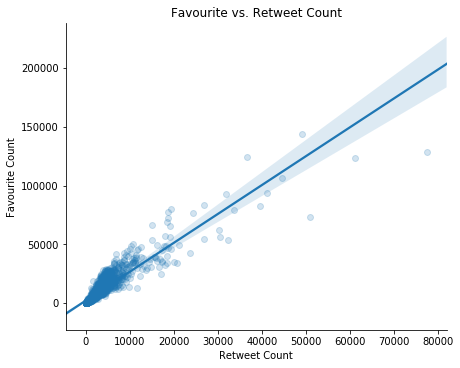

In [88]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favourite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favourite Count')
plt.show()

> This depicts that Favourite Count and Retweet count are **highly correlated**.

#### Displaying Top 10 most tweeted breeds

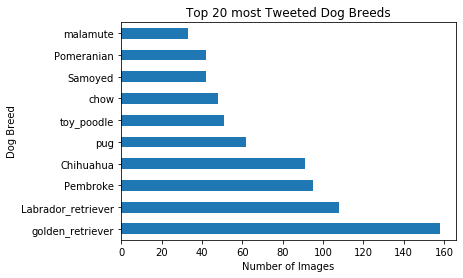

In [89]:
twitter.dog_type.value_counts()[:10].plot(kind='barh')
plt.title('Top 20 most Tweeted Dog Breeds')
plt.xlabel('Number of Images')
plt.ylabel('Dog Breed')
plt.show()

> From this, we can see that **Golden Retriever** is the most tweeted dog breed by a huge margin, followed by Labrador and Pembroke.

#### Standardized Ratings over Time

In [90]:
twitter.timestamp=twitter.timestamp.apply(lambda x: x[:10])

<function matplotlib.pyplot.show(*args, **kw)>

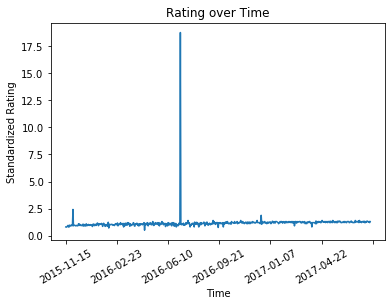

In [91]:
twitter.groupby('timestamp')['ratings'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.xticks(rotation=30)
plt.ylabel('Standardized Rating')
plt.show

Since most of the values lie near zero, we can limit the y-axis to have a better look

<function matplotlib.pyplot.show(*args, **kw)>

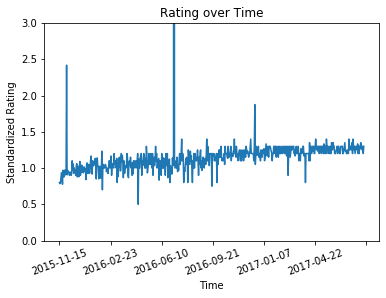

In [92]:
twitter.groupby('timestamp')['ratings'].mean().plot(kind='line')
plt.ylim(0,3)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.xticks(rotation=20)
plt.ylabel('Standardized Rating')
plt.show

#### Most Popular Dog Name

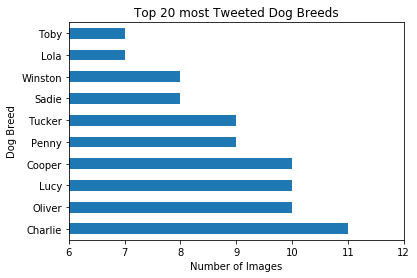

In [109]:
twitter.name.value_counts()[:10].plot(kind='barh')
plt.xlim(6,12)
plt.title('Top 20 most Tweeted Dog Breeds')
plt.xlabel('Number of Images')
plt.ylabel('Dog Breed')
plt.show()